# Ridge Regression 

In [1]:
import numpy as np
from scipy.optimize import minimize

X_train=np.loadtxt('../hw2-answer/data_naive/X_train.txt')
X_valid=np.loadtxt('../hw2-answer/data_naive/X_valid.txt')
X_test=np.loadtxt('../hw2-answer/data_naive/X_test.txt')
y_train=np.loadtxt('../hw2-answer/data_naive/y_train.txt')
y_valid=np.loadtxt('../hw2-answer/data_naive/y_valid.txt')
y_test=np.loadtxt('../hw2-answer/data_naive/y_test.txt')

num_instance, dimension=X_train.shape
W=np.random.rand(dimension,1)

    

In [2]:
from sklearn.preprocessing import MinMaxScaler
X_train=MinMaxScaler().fit_transform(X_train)
X_test=MinMaxScaler().fit_transform(X_test)
X_valid=MinMaxScaler().fit_transform(X_valid)

$ L=\frac{1}{n}(X\theta-Y)^{2}+\lambda||\theta|| $

下段代码要编写一个ridge regression,并且验证不同的 $\lambda$ 对优化结果的影响
我们不仅要给出对应每个 $\lambda$, 最优的 $\theta$, 还要求出每个 $\lambda$ 所对应的loss

In [4]:
def ridge_regression(X,Y,lambda_):
    def ridge_obj(theta):
        num_instance, dimension=X.shape
        risk=(1/num_instance)*np.linalg.norm(np.dot(X,theta)-Y)+lambda_*np.linalg.norm(theta)**2
        return risk
    
    return ridge_obj

def compute_loss(X,Y,theta,lambda_):
        num_instance, dimension=X.shape
        loss=(1/num_instance)*np.linalg.norm(np.dot(X,theta)-Y)
        return loss

In [5]:
def train(X,Y):
    theta0=W
    lambda_list=[10**i for i in range(-5,6)]
    loss_list=[]
    theta_list=[]
    for i in range(-5,6):
        lambda_=10**i
        mini=minimize(ridge_regression(X,Y,lambda_),theta0)
        loss_list.append(compute_loss(X,Y,mini.x,lambda_))
        theta_list.append(mini.x)
        print('lambda: {}'.format(lambda_)+'\n'+'corrsponding theta: {}'.format(mini.x)+'\n'+'corresponding loss: {}'.format(compute_loss(X,Y,mini.x,lambda_)))
    
    index=np.argmin(loss_list)
    theta_min=theta_list[index]
    lambda_min=lambda_list[index]
    return lambda_list,loss_list,(theta_min,lambda_min)

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_fig(lambda_list,loss_list):
    fig=plt.figure()
    plt.semilogx(lambda_list,loss_list)
    plt.title('Loss for Regression')
    plt.xlim(10**(-5),10**5)
    plt.show()

In [7]:
lambda_list,loss_list,(theta_min,lambda_min)=train(X_train,y_train)

lambda: 1e-05
corrsponding theta: [ 9.85020802e+00 -9.82326076e+00 -9.81020101e+00  9.82088820e+00
 -9.73456992e+00  9.80230537e+00 -9.81648614e+00  9.44470516e+00
 -9.77113754e+00  9.86002848e+00  3.47759385e-01  1.13409571e-01
 -1.95253295e-01 -1.23173187e-01  8.64598477e-02 -1.31915707e-01
  2.96499084e-01  2.82387177e-01  4.12059453e-01 -1.91645667e-01
 -6.85483490e-02 -2.76215212e-01  1.21381049e-01 -2.44502349e-01
  2.54865005e-01  1.19286527e-01  2.17121341e-01  1.58796241e-01
  1.39894334e-01  3.46303830e-02 -4.50858151e-02 -4.70899875e-02
 -4.04230876e-01  1.99291033e-01 -7.69211083e-03  3.51488679e-02
 -2.92609228e-02  1.22868854e-01  1.11890406e-01 -2.87490895e-01
 -2.31280660e-03  1.42033247e-01 -1.27043373e-01 -3.61163412e-02
 -3.87776395e-02 -4.66753587e-01  1.56362959e-01 -7.67300686e-02
 -1.41899280e-01  7.24674614e-02 -3.67922997e-01  1.32276999e-01
  3.74147658e-01  3.83401916e-01  3.85154763e-01  7.17631437e-02
  3.77036031e-01 -3.14842701e-01  2.74326871e-01  2.5121

lambda: 10000
corrsponding theta: [ 2.37095625e-07 -5.48746489e-07 -8.75128619e-07  7.47352930e-08
 -1.16221058e-06  3.34338279e-07 -7.78768046e-07  2.30308948e-07
 -8.75698829e-07  6.36081088e-08  7.44526819e-08 -1.33428477e-08
 -1.53266374e-07 -3.36659257e-07 -3.46761839e-07 -4.39521862e-07
 -2.53592967e-07 -6.90573717e-07 -4.27382396e-07 -4.18397832e-07
  1.13646830e-07 -9.53685503e-08 -4.55777308e-07  3.46334981e-08
 -5.06608404e-07 -5.73298575e-07 -4.24890515e-07 -4.43622226e-07
  1.28756680e-08  9.90384792e-08 -1.44249340e-07 -2.39858816e-08
 -4.20017644e-07 -1.20657418e-07 -7.31631626e-08 -1.43050515e-07
 -4.08280946e-07 -2.27759157e-07 -2.65480233e-07 -1.35179769e-07
 -3.38689142e-07  5.55932107e-08 -3.20186991e-07 -8.91928988e-08
 -5.44514983e-09  3.74654298e-08 -4.81520625e-07  2.87036897e-09
 -4.43382822e-07 -4.74237405e-07 -3.15366683e-07 -1.54422509e-07
 -3.28754557e-07 -9.40410639e-08 -1.81207805e-07 -2.77232418e-07
 -2.56516699e-07 -4.99364069e-07 -1.70202266e-07 -1.3301

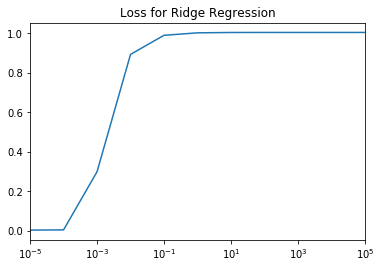

In [8]:
show_fig(lambda_list,loss_list)

In both train set and validation set, the best $\lambda$ is $10^{-5}$, so we use this to predict

In [9]:
def prediction(X):
    predict=np.dot(X,theta_min)
    return predict

In [10]:
prediction(X_test)

array([ -2.47964235,   0.58161358,  12.87718011,  -1.61929466,
         5.10290661, -13.439506  ,   7.47740409,  -5.88966667,
       -16.25649827,  -0.26193508, -13.99698505, -10.61909821,
         1.93161988,  -1.89272334,  -4.94007786, -21.45870626,
         6.32512154,  -2.8240893 ,   4.11193394,  15.64937273,
        -0.94168297,   7.54914969,   2.61910263,  17.25558908,
         3.10124001,   1.23908035,  -5.41386377,   0.5346276 ,
        -3.40758964,  -2.48700142,   8.02819362,  -3.25632901,
         9.07054617,  -9.98560907, -15.2027608 ,   9.51850996,
        11.97389206,  -1.08893365,  -1.57225896, -15.28762208,
        10.17490783,  -5.4359884 ,  -5.64587222,  -3.48047608,
       -12.16258117, -25.92712629,  -0.06256873,   6.71826157,
         5.70104446,   2.66826549])

In [11]:
y_test

array([ -2.8309324 ,   0.69417108,  12.67029779,  -0.92954206,
         4.58592049, -13.02585408,   7.94966951,  -5.4844889 ,
       -15.7896344 ,  -0.16921939, -12.82399642,  -9.74589714,
         0.51709585,  -1.30080086,  -5.58152774, -22.21952411,
         7.02226482,  -2.22587996,   3.40414019,  15.62068452,
        -0.11831958,   6.86229863,   2.08357708,  16.52142514,
         3.92641279,   1.15249962,  -5.07174144,   0.60719744,
        -2.35151992,  -2.82710073,   7.55320658,  -2.99938146,
         9.57426518,  -9.79102779, -15.2208669 ,  10.00414485,
        11.7180808 ,  -0.93641037,  -0.36346696, -14.32001204,
        10.01599198,  -4.71982977,  -6.52190128,  -3.28548183,
       -12.26731454, -25.32145858,   0.70120268,   7.1650268 ,
         5.35200776,   2.71890428])

In [12]:
loss_test=np.linalg.norm(prediction(X_test)-y_test)

In [13]:
loss_test

4.299278082837052

# Compare with sklearn.Ridge

In [14]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10**-5)
ridge.fit(X_train,y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
ridge.coef_

array([ 9.87020627e+00, -9.79727717e+00, -9.82731339e+00,  9.74704585e+00,
       -9.69191211e+00,  9.80092097e+00, -9.79772935e+00,  9.46019822e+00,
       -9.82235180e+00,  9.82253347e+00,  2.76784134e-01,  1.15264472e-01,
       -1.89642505e-01, -8.73741923e-02,  9.88353725e-02, -1.04151956e-01,
        2.43092280e-01,  2.14025385e-01,  3.41998141e-01, -1.85793674e-01,
       -5.49731265e-02, -2.50946341e-01,  6.94001225e-02, -2.22349927e-01,
        2.15305587e-01,  6.55153170e-02,  2.21498966e-01,  1.07139642e-01,
        1.14091172e-01, -5.38528157e-03, -3.03939047e-02, -7.04910788e-02,
       -3.67939879e-01,  1.85939928e-01, -3.42605122e-02,  4.81393337e-02,
       -5.15621597e-02,  1.15820678e-01,  6.25165409e-02, -2.38765214e-01,
       -1.80620960e-02,  1.11760123e-01, -1.10265569e-01, -6.11469063e-02,
       -1.96539559e-04, -3.99269080e-01,  1.21152529e-01, -5.99449716e-02,
       -1.88102766e-01,  6.39373322e-02, -3.62123205e-01,  5.16368958e-02,
        3.29911381e-01,  

In [16]:
ridge.predict(X_test)

array([-2.47178599e+00,  6.52678385e-01,  1.28774788e+01, -1.55974818e+00,
        5.02010975e+00, -1.34083191e+01,  7.61273738e+00, -5.79933218e+00,
       -1.62910896e+01, -2.09674226e-01, -1.39768263e+01, -1.05594751e+01,
        1.71944965e+00, -1.86741084e+00, -5.14150848e+00, -2.15562861e+01,
        6.28971821e+00, -2.76248468e+00,  4.05737389e+00,  1.55138211e+01,
       -7.66799208e-01,  7.39464833e+00,  2.70623714e+00,  1.71891609e+01,
        3.22902406e+00,  1.16294830e+00, -5.47883191e+00,  5.32188085e-01,
       -3.31800024e+00, -2.46140145e+00,  7.98062004e+00, -3.31346071e+00,
        9.31913438e+00, -1.01051438e+01, -1.50694998e+01,  9.59239058e+00,
        1.20605002e+01, -1.07999610e+00, -1.52079788e+00, -1.52629035e+01,
        1.02206507e+01, -5.45774762e+00, -5.68398040e+00, -3.61589273e+00,
       -1.20664536e+01, -2.59703445e+01,  2.09576200e-03,  6.53974022e+00,
        5.77976121e+00,  2.73154542e+00])

In [17]:
loss_ridge_test=np.linalg.norm(ridge.predict(X_test)-y_test)

In [18]:
loss_ridge_test

4.026676001372937

# Lasso Regression(Shooting Algorithm)

In [19]:
import time

In [29]:
def soft(a,delta):
    sign_a = np.sign(a)
    if np.abs(a)-delta <0:
        return 0 
    else:
        return sign_a*(abs(a)-delta)

In [42]:
def Lasso_reg(X,Y,lambda_,max_iteration=1000,threshold=1e-5):
    start_time=time.time()
    #initialize W, the parameter
    num_instance,dimension=X.shape
    init_w=np.linalg.inv((np.dot(X.T,X)+lambda_*np.identity(dimension))).dot(X.T).dot(Y)
    converge=False
    a=np.zeros(dimension)
    c=np.zeros(dimension)
    w_list=[]
    count=0
    w_list.append(init_w)
    
    while (converge==False) and (count<=max_iteration):
        w=w_list[count].copy()
        
        for j in range(dimension):
            temp1=0
            temp2=0
            for i in range(num_instance):
                temp1+=X[i,j]**2
                temp2+=X[i,j]*(Y[i]-np.dot(w.T,X[i,:])+w[j]*X[i,j])
                
            a[j]=2*temp1
            c[j]=2*temp2
            if a[j]!=0:
                w[j]=soft(c[j]/a[j],lambda_/a[j])
            else:
                w[j]=0
        w_list.append(w)
        converge=(np.linalg.norm(w_list[count+1]-w_list[count])<=threshold)
        diff=np.linalg.norm(w_list[count+1]-w_list[count])
       # print('differece: {}'.format(np.linalg.norm(w_list[count+1]-w_list[count])))
        count+=1
    run_time = time.time()-start_time
    #print('lambda: {}'.format(lambda_)+' '+ 'w: {}'.format(w_list[len(w_list)-1])+"\n"+'a: {}'.format(a)+ '\n '+ 'c: {}'.format(c))
    
    return w_list[len(w_list)-1],run_time,count,diff

In [43]:
Lasso_reg(X_train,y_train,lambda_=1e-2,max_iteration=1000,threshold=1e-5)

(array([ 9.88483960e+00, -9.78937809e+00, -9.77615311e+00,  9.84754528e+00,
        -9.85378018e+00,  9.81553607e+00, -9.85846890e+00,  9.49397562e+00,
        -9.77371158e+00,  9.73098906e+00,  2.63248949e-01,  1.86833102e-02,
        -1.28294951e-01, -2.05369580e-02,  5.60309999e-02, -9.96630045e-02,
         2.69450208e-01,  2.46260772e-01,  3.13995607e-01, -1.11213618e-01,
        -3.00025662e-02, -2.01173084e-01,  8.16041659e-02, -1.89462523e-01,
         2.56252071e-01,  1.44717357e-01,  1.06455524e-01,  1.81280189e-01,
         1.28104678e-01,  2.83593800e-02,  3.00673513e-02, -2.21576421e-02,
        -2.93793419e-01,  1.36130309e-01,  1.43982350e-02, -6.40254421e-02,
        -2.74635233e-02,  5.95199842e-02,  5.04486535e-02, -1.67124898e-01,
         1.73140367e-02,  9.57057109e-02, -1.16354754e-01, -2.21701803e-03,
        -7.23398045e-02, -3.35055583e-01,  1.19271788e-01, -8.28683905e-02,
        -5.89442662e-02,  5.58291678e-02, -2.70444005e-01,  1.39080867e-01,
         3.1

**Sparsity**

In [46]:
Lasso_reg(X_train,y_train,lambda_=3,max_iteration=1000,threshold=1e-5)

(array([ 9.76140862e+00, -9.23379110e+00, -9.34827186e+00,  9.39907542e+00,
        -9.73195868e+00,  9.68412401e+00, -9.43084236e+00,  9.34508841e+00,
        -9.54977978e+00,  9.22101065e+00,  3.00964104e-02,  0.00000000e+00,
         4.00909092e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.88218044e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.81989932e-02,  1.57787935e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.69007908e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.98760957e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [47]:
lambda_list_lasso=[10**i for i in range(-5,6)]
diff_list=[]
w_list_list=[]
for lambda_lasso in lambda_list_lasso:
    w_list,run_time,count,diff=Lasso_reg(X_train,y_train,lambda_lasso,max_iteration=1000,threshold=1e-5)
    diff_list.append(diff)
    w_list_list.append(w_list)

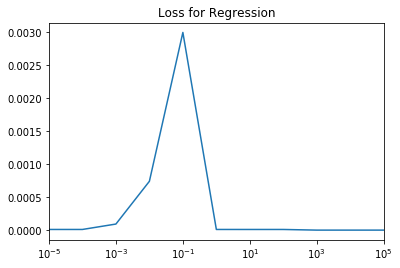

In [50]:
show_fig(lambda_list_lasso,diff_list)

In [51]:
lambda_list_lasso2=np.arange(0.1,1,0.1)
diff_list2=[]
w_list_list2=[]
for lambda_lasso in lambda_list_lasso2:
    w_list,run_time,count,diff=Lasso_reg(X_train,y_train,lambda_lasso,max_iteration=1000,threshold=1e-5)
    diff_list2.append(diff)
    w_list_list2.append(w_list)

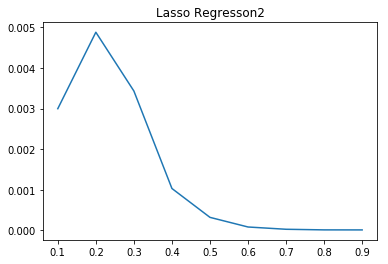

In [52]:
plt.plot(lambda_list_lasso2,diff_list2)
plt.title('Lasso Regresson2')
plt.show()

In [53]:
index_min=np.argmin(diff_list2)
theta_min_lasso=w_list_list2[index_min]

In [54]:
def predict_lasso(X,theta_min):
    prediction=np.dot(X,theta_min)
    return prediction

In [56]:
prediction_lasso=predict_lasso(X_test,theta_min_lasso)

In [58]:
loss_lasso=np.linalg.norm(y_test-prediction_lasso)

In [59]:
loss_lasso

2.45314717472669

# Homotopy Method

In [66]:
def homotopy(X,Y,max_iteration=1000,threshold=1e-5):
    start_time=time.time()
    #initialize W, the parameter
    num_instance,dimension=X.shape
    lambda_init=np.max(np.abs(np.dot(X.T,Y)))
    init_w=np.zeros((dimension,1))
    #np.linalg.inv((np.dot(X.T,X)+lambda_*np.identity(dimension))).dot(X.T).dot(Y)
    converge=False
    a=np.zeros(dimension)
    c=np.zeros(dimension)
    w_list=[]
    lambda_list=[]
    count=0
    w_list.append(init_w)
    lambda_list.append(lambda_init)
    while (converge==False) and (count<=max_iteration):
        w=w_list[count].copy()
        lambda_=lambda_list[count].copy()
        for j in range(dimension):
            temp1=0
            temp2=0
            for i in range(num_instance):
                temp1+=X[i,j]**2
                temp2+=X[i,j]*(Y[i]-np.dot(w.T,X[i,:])+w[j]*X[i,j])
                
            a[j]=2*temp1
            c[j]=2*temp2
            if a[j]!=0:
                w[j]=soft(c[j]/a[j],lambda_/a[j])
            else:
                w[j]=0
        lambda_/=2
        w_list.append(w)
        lambda_list.append(lambda_)
        converge=(np.linalg.norm(w_list[count+1]-w_list[count])<=threshold)
        diff=np.linalg.norm(w_list[count+1]-w_list[count])
        count+=1
    run_time = time.time()-start_time
    #print('lambda: {}'.format(lambda_)+' '+ 'w: {}'.format(w_list[len(w_list)-1])+"\n"+'a: {}'.format(a)+ '\n '+ 'c: {}'.format(c))
    
    return w_list[len(w_list)-1],run_time,count,diff,lambda_list

In [67]:
w,run_time,count,diff,lambda_list=homotopy(X_train,y_train,max_iteration=1000,threshold=1e-5)

In [68]:
w

array([[ 9.82346104e+00],
       [-9.84590879e+00],
       [-9.85277061e+00],
       [ 9.78895646e+00],
       [-9.73804356e+00],
       [ 9.79452631e+00],
       [-9.83046504e+00],
       [ 9.44531132e+00],
       [-9.77328584e+00],
       [ 9.88676121e+00],
       [ 3.53506732e-01],
       [ 1.38504818e-01],
       [-1.90160695e-01],
       [-1.70851629e-01],
       [ 1.17856804e-01],
       [-9.84329357e-02],
       [ 3.13194282e-01],
       [ 3.00277848e-01],
       [ 4.37039708e-01],
       [-2.41734135e-01],
       [-9.05391049e-02],
       [-2.97030940e-01],
       [ 1.56532081e-01],
       [-2.58148935e-01],
       [ 2.57724089e-01],
       [ 1.02021650e-01],
       [ 2.91580629e-01],
       [ 1.24184295e-01],
       [ 1.65703607e-01],
       [ 4.35605786e-02],
       [-2.44886020e-02],
       [-4.48371647e-02],
       [-3.42523983e-01],
       [ 2.37034056e-01],
       [-5.62396674e-02],
       [ 8.34637847e-02],
       [ 8.90726769e-03],
       [ 1.85188206e-01],
       [ 9.9

In [69]:
#print('w: {}'.format(w))
print('run_time: {}'.format(run_time))
print('count: {}'.format(count))
print('diff: {}'.format(diff))
print('lambda_list: {}'.format(lambda_list))

run_time: 49.85776090621948
count: 1001
diff: 0.0008476072407860893
lambda_list: [148.12321714486916, 74.06160857243458, 37.03080428621729, 18.515402143108645, 9.257701071554322, 4.628850535777161, 2.3144252678885806, 1.1572126339442903, 0.5786063169721452, 0.2893031584860726, 0.1446515792430363, 0.07232578962151814, 0.03616289481075907, 0.018081447405379536, 0.009040723702689768, 0.004520361851344884, 0.002260180925672442, 0.001130090462836221, 0.0005650452314181105, 0.00028252261570905525, 0.00014126130785452762, 7.063065392726381e-05, 3.5315326963631906e-05, 1.7657663481815953e-05, 8.828831740907977e-06, 4.414415870453988e-06, 2.207207935226994e-06, 1.103603967613497e-06, 5.518019838067485e-07, 2.7590099190337427e-07, 1.3795049595168713e-07, 6.897524797584357e-08, 3.4487623987921783e-08, 1.7243811993960892e-08, 8.621905996980446e-09, 4.310952998490223e-09, 2.1554764992451115e-09, 1.0777382496225557e-09, 5.388691248112779e-10, 2.6943456240563893e-10, 1.3471728120281947e-10, 6.7358640

# Vectorization

In [74]:
def soft_vect(a,delta):
        sign_a = np.sign(a)
        pos_part = np.abs(a)-delta
        pos_part[pos_part<0] = 0  
        return sign_a*pos_part

In [75]:
def lasso_shooting_vectorize(X,y,lambda_reg=0.1,max_steps = 1000,tolerence = 1e-5):
    start_time = time.time()
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.linalg.inv(X.T.dot(X)+lambda_reg*np.identity(d)).dot(X.T).dot(y) # result w dimension: d
    steps = 0
    converge = False
   
    # Instead of loop calculate a c w using matrix operation
    # Store a c w into three d-dimension vector
    # a can be calculated using the diagonal elements of XT.X
    while converge==False and steps<max_steps:
        steps+=1
        old_w = w
        a = 2*X.T.dot(X).diagonal()
        # steps for calculating c
        # duplicate y-wx d times
        y_wx = np.tile(y-X.dot(w),(d,1))
        # duplicate w n times
        w_n = np.tile(w,(n,1))
        # elementwise multiplication of w_n and x
        wjxij =w_n*X
        # elementwise addition 
        right = y_wx.T + wjxij
        # return c
        c = 2*(X.T.dot(right).diagonal())
        w = soft_vect(a/c,lambda_reg/a)
        convergence = np.sum(np.abs(w-old_w))<tolerence
        run_time = time.time()-start_time
    print('lambda:',lambda_reg,'run_time:',run_time,'steps_taken:',steps)
    return w

In [76]:
w = lasso_shooting_vectorize(X_train,y_train)

lambda: 0.1 run_time: 0.2553393840789795 steps_taken: 1000
